In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
COUNTRY_PATH = "../noah_example/Country_Profiles_Clean.csv"
#MEDAL_PATH = "../noah_example/Datasets/Olympic_Medal_Tally_History.csv"
EVENT_PATH = "../noah_example/Datasets/Olympic_Athlete_Event_Details.csv"
CURRENT_YEAR = 2024
OLDEST_YEAR_OF_INTEREST = CURRENT_YEAR - 20
MEDAL_TYPES = ('Gold', 'Silver', 'Bronze')

In [3]:
# read it in:
country_df= pd.read_csv(COUNTRY_PATH).drop(index=234)
print(country_df.shape)
country_df.head()

(234, 2)


,noc,country
0,AFG,Afghanistan
1,ALB,Albania
2,ALG,Algeria
3,ASA,American Samoa
4,AND,Andorra


In [4]:
dup_both_mask_s = country_df.duplicated(keep=False)
print(dup_both_mask_s.sum())
dup_noc_mask_s = country_df.duplicated(subset='noc', keep=False)
print(dup_noc_mask_s.sum())
dup_country_mask_s = country_df.duplicated(subset='country', keep=False)
country_df[dup_country_mask_s].sort_values("country")


0
0


,noc,country
10,ANZ,Australia
11,AUS,Australia
23,BOH,Czechia
52,CZE,Czechia
60,GDR,Germany
75,GER,Germany
228,FRG,Germany
173,SAA,Germany
54,PRK,Republic of Korea
166,KOR,Republic of Korea


In [5]:
dup_both_mask_s.sum()

0

In [6]:
dup_country_mask_s.sum() 

23

In [7]:
# medal_df= pd.read_csv(MEDAL_PATH).rename(columns = {"country_noc" : "noc"})
# print(medal_df.shape)
# medal_df.head()

In [8]:
#medal_df.info()

In [9]:
#medal_df.describe()

In [10]:
# #merge the 2 datasets: country and game sum
# country_medal_df = pd.merge(country_df, medal_df, on="country")
# print(country_medal_df.shape)
# country_medal_df.head()

In [11]:
# noc_mismatch_mask_s = country_medal_df.noc_x != country_medal_df.noc_y
# country_medal_df[noc_mismatch_mask_s]

In [12]:
#country_medal_df.loc[noc_mismatch_mask_s, "country"].unique()

In [13]:
#Country_medal_df = Country_medal_df.rename(columns = {"noc_x" : "noc"})
#Country_medal_df.head()

In [14]:
event_df= pd.read_csv(EVENT_PATH)\
.dropna()\
.rename(columns = {"country_noc" : "noc"})

event_df[['year', 'season']] = event_df['edition'].str.split(' ', n=1, expand=True)
event_df['year'] = event_df['year'].astype(int)

print(event_df.info())
print(event_df.shape)
event_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 44687 entries, 20 to 316816
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   edition      44687 non-null  object
 1   edition_id   44687 non-null  int64 
 2   noc          44687 non-null  object
 3   sport        44687 non-null  object
 4   event        44687 non-null  object
 5   result_id    44687 non-null  int64 
 6   athlete      44687 non-null  object
 7   athlete_id   44687 non-null  int64 
 8   pos          44687 non-null  object
 9   medal        44687 non-null  object
 10  isTeamSport  44687 non-null  bool  
 11  year         44687 non-null  int64 
 12  season       44687 non-null  object
dtypes: bool(1), int64(4), object(8)
memory usage: 4.5+ MB
None
(44687, 13)


,edition,edition_id,noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,year,season
20,1908 Summer Olympics,5,ANZ,Athletics,"3,500 metres Race Walk, Men",56421,Harry Kerr,64719,3,Bronze,False,1908,Summer Olympics
30,1908 Summer Olympics,5,ANZ,Boxing,"Middleweight, Men",21263,Snowy Baker,45153,2,Silver,False,1908,Summer Olympics
32,1908 Summer Olympics,5,ANZ,Rugby,"Rugby, Men",31505,John Barnett,11237,1,Gold,True,1908,Summer Olympics
33,1908 Summer Olympics,5,ANZ,Rugby,"Rugby, Men",31505,Phil Carmichael,11239,1,Gold,True,1908,Summer Olympics
34,1908 Summer Olympics,5,ANZ,Rugby,"Rugby, Men",31505,Dan Carroll,11240,1,Gold,True,1908,Summer Olympics


In [15]:
#merge country medal with olympic athlete event to extract gender
country_event_df = pd.merge(event_df, country_df, on="noc", how="left")
country_event_df.info()
print(country_event_df.shape)
country_event_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44687 entries, 0 to 44686
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   edition      44687 non-null  object
 1   edition_id   44687 non-null  int64 
 2   noc          44687 non-null  object
 3   sport        44687 non-null  object
 4   event        44687 non-null  object
 5   result_id    44687 non-null  int64 
 6   athlete      44687 non-null  object
 7   athlete_id   44687 non-null  int64 
 8   pos          44687 non-null  object
 9   medal        44687 non-null  object
 10  isTeamSport  44687 non-null  bool  
 11  year         44687 non-null  int64 
 12  season       44687 non-null  object
 13  country      44687 non-null  object
dtypes: bool(1), int64(4), object(9)
memory usage: 4.5+ MB
(44687, 14)


,edition,edition_id,noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,year,season,country
44682,2022 Winter Olympics,62,USA,Speed Skating,"500 metres, Women",19020424,Erin Jackson,138378,1,Gold,False,2022,Winter Olympics,United States
44683,2022 Winter Olympics,62,USA,Speed Skating,"1,000 metres, Women",19020425,Brittany Bowe,128778,3,Bronze,False,2022,Winter Olympics,United States
44684,2022 Winter Olympics,62,USA,Bobsleigh,"Monobob, Women",19019671,Kaillie Humphries,118672,1,Gold,False,2022,Winter Olympics,United States
44685,2022 Winter Olympics,62,USA,Bobsleigh,"Monobob, Women",19019671,Elana Meyers Taylor,118644,2,Silver,False,2022,Winter Olympics,United States
44686,2022 Winter Olympics,62,CAN,Bobsleigh,"Monobob, Women",19019671,Christine de Bruin,136825,3,Bronze,False,2022,Winter Olympics,Canada


In [16]:
#I want to filter for up to 20years:
year_mask_s = country_event_df["year"] >= OLDEST_YEAR_OF_INTEREST 
country_event_recent_df = country_event_df[year_mask_s]
print(country_event_recent_df.shape)
country_event_recent_df.head()

(13697, 14)


,edition,edition_id,noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,year,season,country
55,2012 Summer Olympics,54,BRN,Athletics,"1,500 metres, Women",302391,Maryam Jamal,115219,1,Gold,False,2012,Summer Olympics,Bahrain
56,2016 Summer Olympics,59,BRN,Athletics,"Marathon, Women",359066,Eunice Kirwa,129369,2,Silver,False,2016,Summer Olympics,Bahrain
57,2016 Summer Olympics,59,BRN,Athletics,"3,000 metres Steeplechase, Women",359093,Ruth Jebet,129374,1,Gold,False,2016,Summer Olympics,Bahrain
58,2020 Summer Olympics,61,BRN,Athletics,"10,000 metres, Women",19000739,Kalkidan Gezahegne,141289,2,Silver,False,2020,Summer Olympics,Bahrain
60,2008 Summer Olympics,53,AFG,Taekwondo,"Flyweight, Men",262097,Rohullah Nikpai,117410,=3,Bronze,False,2008,Summer Olympics,Afghanistan


In [17]:
#country_event_recent_df.sort_values("year")

In [18]:
#look for gold wins: female, last 10 years and top 10 countries
#olympic athlete event to seperate columns
# Split the 'Event' column into 'Event' and 'Gender' columns
country_event_recent_df[['Event', 'Gender']] = country_event_recent_df['event'].str.extract(r'(.*), (\w+)')
print(country_event_recent_df.info())
print(country_event_recent_df.shape)
country_event_recent_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 13697 entries, 55 to 44686
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   edition      13697 non-null  object
 1   edition_id   13697 non-null  int64 
 2   noc          13697 non-null  object
 3   sport        13697 non-null  object
 4   event        13697 non-null  object
 5   result_id    13697 non-null  int64 
 6   athlete      13697 non-null  object
 7   athlete_id   13697 non-null  int64 
 8   pos          13697 non-null  object
 9   medal        13697 non-null  object
 10  isTeamSport  13697 non-null  bool  
 11  year         13697 non-null  int64 
 12  season       13697 non-null  object
 13  country      13697 non-null  object
 14  Event        13697 non-null  object
 15  Gender       13697 non-null  object
dtypes: bool(1), int64(4), object(11)
memory usage: 1.7+ MB
None
(13697, 16)


/var/folders/t3/shypb4d90rggs0g7t37cwckc0000gn/T/ipykernel_9170/3749828534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_event_recent_df[['Event', 'Gender']] = country_event_recent_df['event'].str.extract(r'(.*), (\w+)')
/var/folders/t3/shypb4d90rggs0g7t37cwckc0000gn/T/ipykernel_9170/3749828534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_event_recent_df[['Event', 'Gender']] = country_event_recent_df['event'].str.extract(r'(.*), (\w+)')


,edition,edition_id,noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,year,season,country,Event,Gender
55,2012 Summer Olympics,54,BRN,Athletics,"1,500 metres, Women",302391,Maryam Jamal,115219,1,Gold,False,2012,Summer Olympics,Bahrain,"1,500 metres",Women
56,2016 Summer Olympics,59,BRN,Athletics,"Marathon, Women",359066,Eunice Kirwa,129369,2,Silver,False,2016,Summer Olympics,Bahrain,Marathon,Women
57,2016 Summer Olympics,59,BRN,Athletics,"3,000 metres Steeplechase, Women",359093,Ruth Jebet,129374,1,Gold,False,2016,Summer Olympics,Bahrain,"3,000 metres Steeplechase",Women
58,2020 Summer Olympics,61,BRN,Athletics,"10,000 metres, Women",19000739,Kalkidan Gezahegne,141289,2,Silver,False,2020,Summer Olympics,Bahrain,"10,000 metres",Women
60,2008 Summer Olympics,53,AFG,Taekwondo,"Flyweight, Men",262097,Rohullah Nikpai,117410,=3,Bronze,False,2008,Summer Olympics,Afghanistan,Flyweight,Men
61,2012 Summer Olympics,54,AFG,Taekwondo,"Featherweight, Men",325026,Rohullah Nikpai,117410,=3,Bronze,False,2012,Summer Olympics,Afghanistan,Featherweight,Men
66,2004 Summer Olympics,26,AZE,Boxing,"Flyweight, Men",27411,Fuad Aslanov,106167,=3,Bronze,False,2004,Summer Olympics,Azerbaijan,Flyweight,Men
67,2004 Summer Olympics,26,AZE,Boxing,"Bantamweight, Men",27447,Ağası Məmmədov,90027,=3,Bronze,False,2004,Summer Olympics,Azerbaijan,Bantamweight,Men
68,2004 Summer Olympics,26,AZE,Shooting,"Sporting Pistol, 25 metres, Women",52023,İradə Aşumova,41255,3,Bronze,False,2004,Summer Olympics,Azerbaijan,"Sporting Pistol, 25 metres",Women
69,2004 Summer Olympics,26,AZE,Shooting,"Skeet, Women",52043,Zemfira Meftaxetdinova,93007,3,Bronze,False,2004,Summer Olympics,Azerbaijan,Skeet,Women


In [19]:
country_event_recent_df['Gender'].value_counts()

Gender
Men      6822
Women    6039
Mixed     526
Open      310
Name: count, dtype: int64

In [20]:
female_mask_s = country_event_recent_df['Gender'] == 'Women'
female_country_event_recent_df = country_event_recent_df[female_mask_s]
print(female_country_event_recent_df.shape)
female_country_event_recent_df.head()

(6039, 16)


,edition,edition_id,noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,year,season,country,Event,Gender
55,2012 Summer Olympics,54,BRN,Athletics,"1,500 metres, Women",302391,Maryam Jamal,115219,1,Gold,False,2012,Summer Olympics,Bahrain,"1,500 metres",Women
56,2016 Summer Olympics,59,BRN,Athletics,"Marathon, Women",359066,Eunice Kirwa,129369,2,Silver,False,2016,Summer Olympics,Bahrain,Marathon,Women
57,2016 Summer Olympics,59,BRN,Athletics,"3,000 metres Steeplechase, Women",359093,Ruth Jebet,129374,1,Gold,False,2016,Summer Olympics,Bahrain,"3,000 metres Steeplechase",Women
58,2020 Summer Olympics,61,BRN,Athletics,"10,000 metres, Women",19000739,Kalkidan Gezahegne,141289,2,Silver,False,2020,Summer Olympics,Bahrain,"10,000 metres",Women
68,2004 Summer Olympics,26,AZE,Shooting,"Sporting Pistol, 25 metres, Women",52023,İradə Aşumova,41255,3,Bronze,False,2004,Summer Olympics,Azerbaijan,"Sporting Pistol, 25 metres",Women


In [21]:
## Filter for Summer and Winter Olympics
#female_summer_olympics_df = female_country_event_recent_df[female_country_event_recent_df['edition'].str.contains('Summer Olympics')]
#female_winter_olympics_df = female_country_event_recent_df[female_country_event_recent_df['edition'].str.contains('Winter Olympics')]
#print(female_summer_olympics_df.shape)
#print(female_winter_olympics_df.shape)

In [22]:
#print(female_summer_olympics_df.info())
#print(female_winter_olympics_df.info())

In [23]:
#female_summer_olympics_df.head(3)

In [24]:
#female_winter_olympics_df.head(3)

In [25]:
female_country_event_recent_df['medal'].value_counts()

medal
Bronze    2058
Gold      1999
Silver    1982
Name: count, dtype: int64

In [26]:
female_country_event_recent_df['medal'].value_counts().index


Index(['Bronze', 'Gold', 'Silver'], dtype='object', name='medal')

In [27]:
female_country_event_recent_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6039 entries, 55 to 44686
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   edition      6039 non-null   object
 1   edition_id   6039 non-null   int64 
 2   noc          6039 non-null   object
 3   sport        6039 non-null   object
 4   event        6039 non-null   object
 5   result_id    6039 non-null   int64 
 6   athlete      6039 non-null   object
 7   athlete_id   6039 non-null   int64 
 8   pos          6039 non-null   object
 9   medal        6039 non-null   object
 10  isTeamSport  6039 non-null   bool  
 11  year         6039 non-null   int64 
 12  season       6039 non-null   object
 13  country      6039 non-null   object
 14  Event        6039 non-null   object
 15  Gender       6039 non-null   object
dtypes: bool(1), int64(4), object(11)
memory usage: 760.8+ KB


In [28]:
female_country_event_recent_df.describe()

,edition_id,result_id,athlete_id,year
count,6039.000000,6.039000e+03,6.039000e+03,6039.000000
mean,52.446432,4.897997e+06,1.472210e+05,2012.778937
std,11.582262,7.814463e+06,2.304139e+05,5.773118
min,26.000000,2.600000e+01,2.480000e+02,2004.000000
25%,53.000000,2.600500e+05,1.077225e+05,2008.000000
50%,57.000000,3.500880e+05,1.187680e+05,2012.000000
75%,60.000000,9.000700e+06,1.301630e+05,2018.000000
max,62.000000,1.902080e+07,2.506221e+06,2022.000000


In [29]:
medals_per_country = female_country_event_recent_df.groupby('country')['medal'].count().sort_values(ascending=False)
medals_per_country.head(10)

country
United States                 969
People's Republic of China    462
Russian Federation            436
Canada                        398
Germany                       320
Australia                     302
Netherlands                   275
Japan                         249
Great Britain                 225
France                        183
Name: medal, dtype: int64

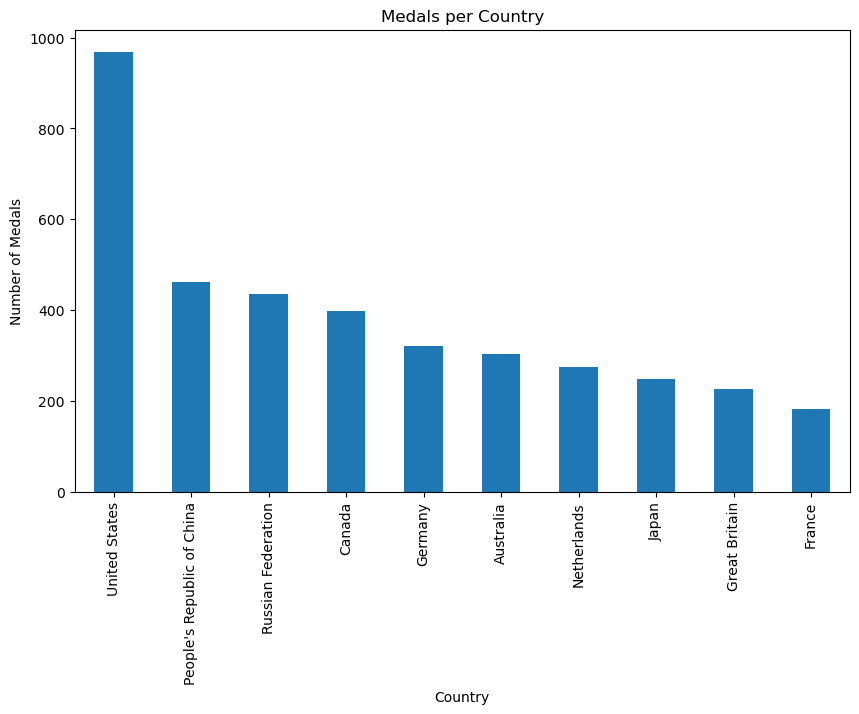

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
medals_per_country = female_country_event_recent_df.groupby('country')['medal'].count().sort_values(ascending=False)

medals_per_country.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Medals per Country')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.show()

In [31]:
medals_per_year = female_country_event_recent_df.groupby('year')['medal'].count()
medals_per_year.head(10)

year
2004     902
2006     228
2008     920
2010     231
2012     916
2014     246
2016     962
2018     256
2020    1113
2022     265
Name: medal, dtype: int64

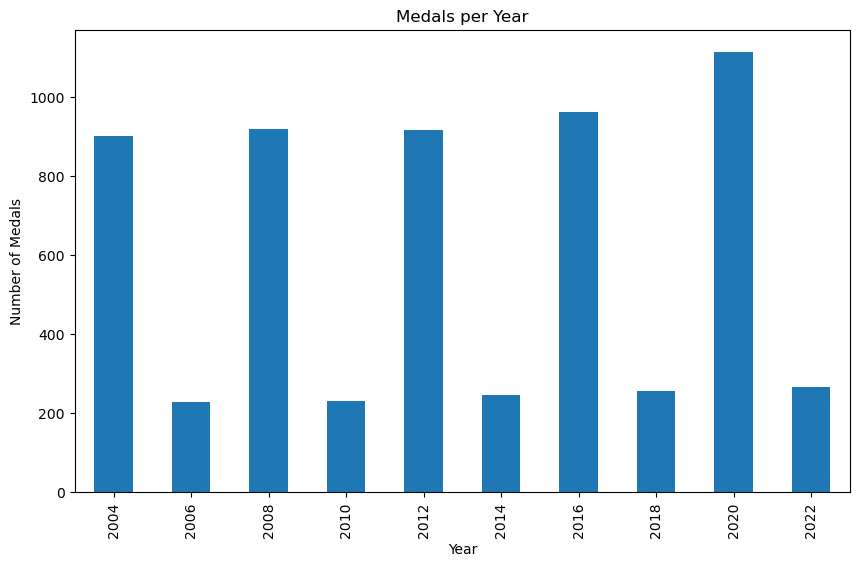

In [32]:
medals_per_year = female_country_event_recent_df.groupby('year')['medal'].count()

medals_per_year.head(12).plot(kind='bar', figsize=(10, 6))
plt.title('Medals per Year')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.show()

In [33]:
medals_per_type = female_country_event_recent_df['medal'].value_counts()
medals_per_type.head(10)

medal
Bronze    2058
Gold      1999
Silver    1982
Name: count, dtype: int64

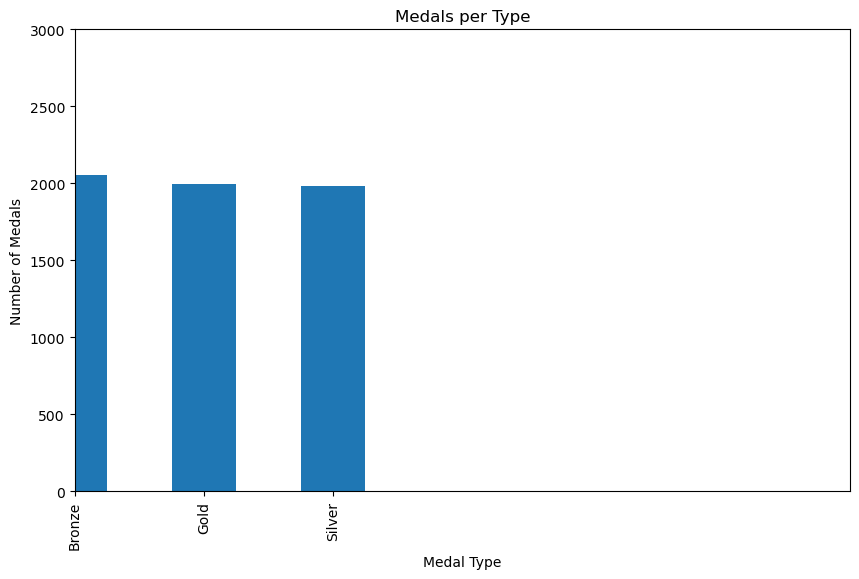

In [60]:
medals_per_type = female_country_event_recent_df['medal'].value_counts()

medals_per_type.plot(kind='bar', figsize=(10, 6))
plt.title('Medals per Type')
plt.xlabel('Medal Type')
plt.ylabel('Number of Medals')

# Set X/Y Limits
plt.xlim(0, 6)
plt.ylim(0, 3000)
plt.show()

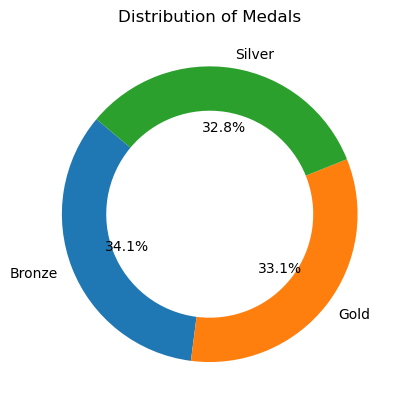

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

female_country_event_recent_df

# Count the number of each medal type
medal_counts = female_country_event_recent_df['medal'].value_counts()

# Create a donut chart
plt.pie(medal_counts, labels=medal_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Distribution of Medals')
plt.show()

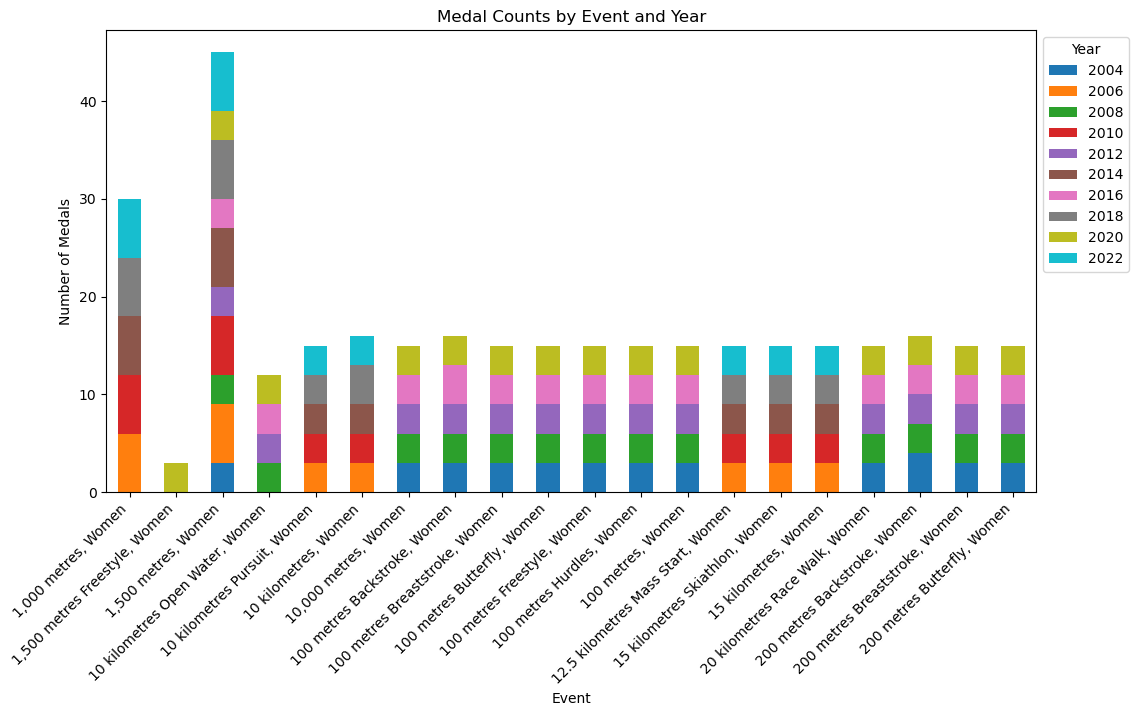

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
female_country_event_recent_df


# Pivot table to group data by event and year
medal_counts = female_country_event_recent_df.pivot_table(index='event', columns='year', values='medal', aggfunc='count')

# Create a stacked bar chart
medal_counts.head(20).plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Medal Counts by Event and Year')
plt.xlabel('Event')
plt.ylabel('Number of Medals')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [36]:
#mask = female_summer_olympics_df.medal == "Gold"
#Gold_female_summer_olympics_df = female_summer_olympics_df.loc[mask]
#print(Gold_female_summer_olympics_df.shape)
#Gold_female_summer_olympics_df.head()

In [37]:
#Gold_female_summer_olympics_df["event"].values

In [38]:
#Gold_female_summer_olympics_df["country"].values

In [39]:
def get_medal_color_df(df, color):
    if color not in MEDAL_TYPES:
        raise ValueError(f"Invalid medal type {color}")

    mask = df.medal == color
    color_df = df.loc[mask]
    print(color_df.shape)
    return color_df

In [40]:
#female_gold_df = get_medal_color_df(female_country_event_recent_df, 'Gold')
get_medal_color_df(female_country_event_recent_df, 'Gold').head(3)

(1999, 16)


,edition,edition_id,noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,year,season,country,Event,Gender
55,2012 Summer Olympics,54,BRN,Athletics,"1,500 metres, Women",302391,Maryam Jamal,115219,1,Gold,False,2012,Summer Olympics,Bahrain,"1,500 metres",Women
57,2016 Summer Olympics,59,BRN,Athletics,"3,000 metres Steeplechase, Women",359093,Ruth Jebet,129374,1,Gold,False,2016,Summer Olympics,Bahrain,"3,000 metres Steeplechase",Women
139,2020 Summer Olympics,61,BER,Triathlon,"Olympic Distance, Women",18000699,Flora Duffy,116209,1,Gold,False,2020,Summer Olympics,Bermuda,Olympic Distance,Women


In [41]:
gold_medals = female_country_event_recent_df[female_country_event_recent_df['medal'] == 'Gold'].groupby('country')['medal'].count().sort_values(ascending=False)
top_10_gold = gold_medals.head(10)
top_10_gold

country
United States                 432
People's Republic of China    182
Russian Federation            166
Canada                        151
Netherlands                   117
Germany                       114
Australia                      96
Japan                          76
Great Britain                  74
Republic of Korea              57
Name: medal, dtype: int64

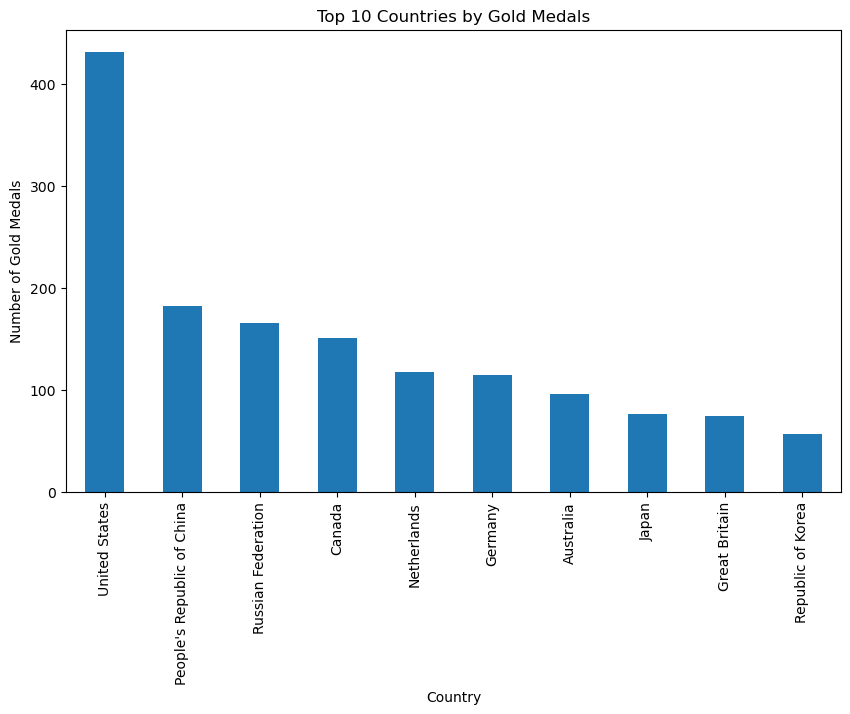

In [42]:
gold_medals = female_country_event_recent_df[female_country_event_recent_df['medal'] == 'Gold'].groupby('country')['medal'].count().sort_values(ascending=False)
top_10_gold = gold_medals.head(10)

top_10_gold.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Countries by Gold Medals')
plt.xlabel('Country')
plt.ylabel('Number of Gold Medals')
plt.show()

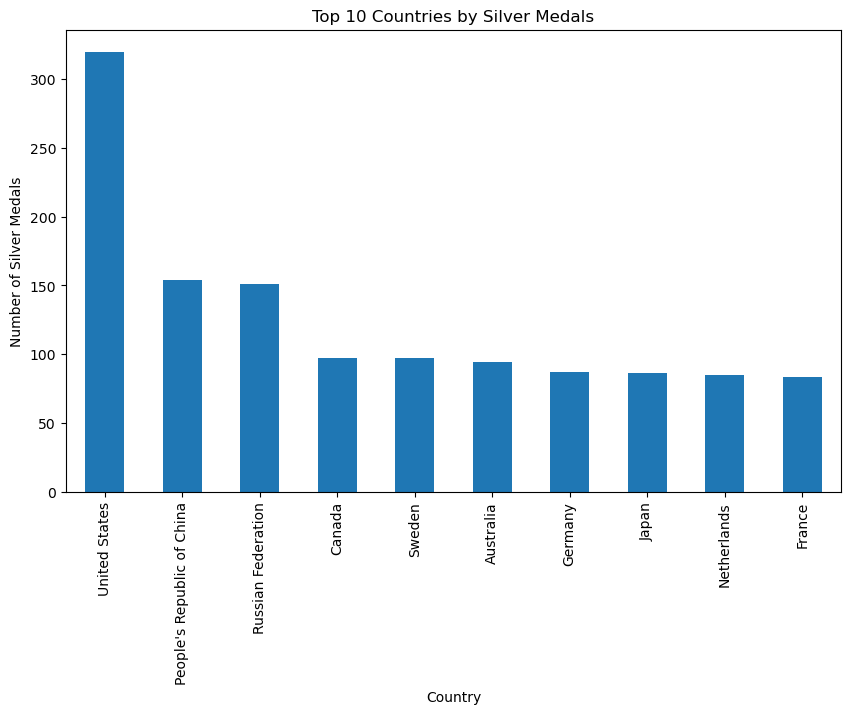

In [59]:
silver_medals = female_country_event_recent_df[female_country_event_recent_df['medal'] == 'Silver'].groupby('country')['medal'].count().sort_values(ascending=False)
top_10_silver = silver_medals.head(10)

top_10_silver.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Countries by Silver Medals')
plt.xlabel('Country')
plt.ylabel('Number of Silver Medals')
plt.show()

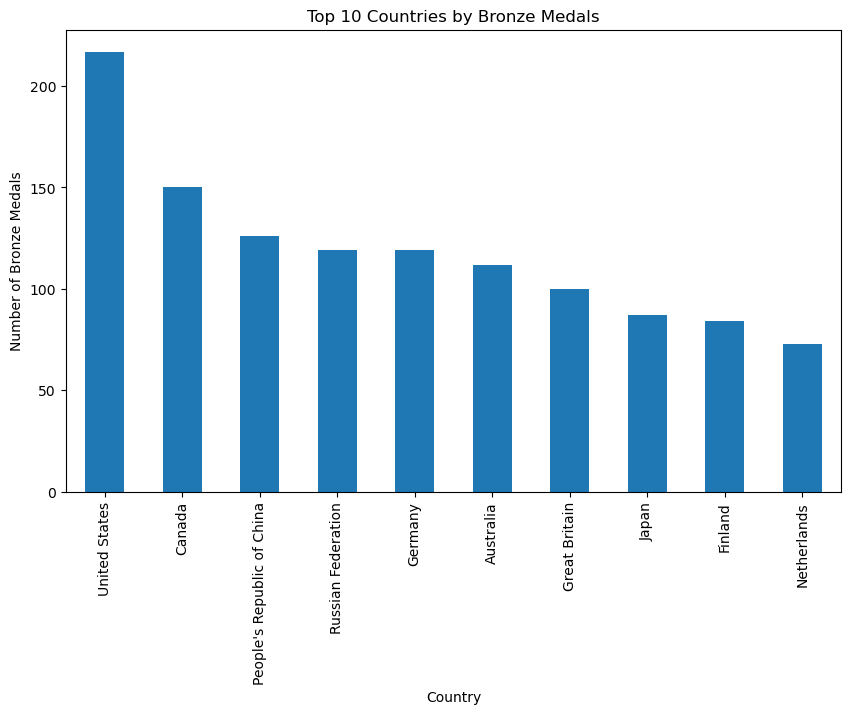

In [49]:
bronze_medals = female_country_event_recent_df[female_country_event_recent_df['medal'] == 'Bronze'].groupby('country')['medal'].count().sort_values(ascending=False)
top_10_bronze = bronze_medals.head(10)

top_10_bronze.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Countries by Bronze Medals')
plt.xlabel('Country')
plt.ylabel('Number of Bronze Medals')
plt.show()

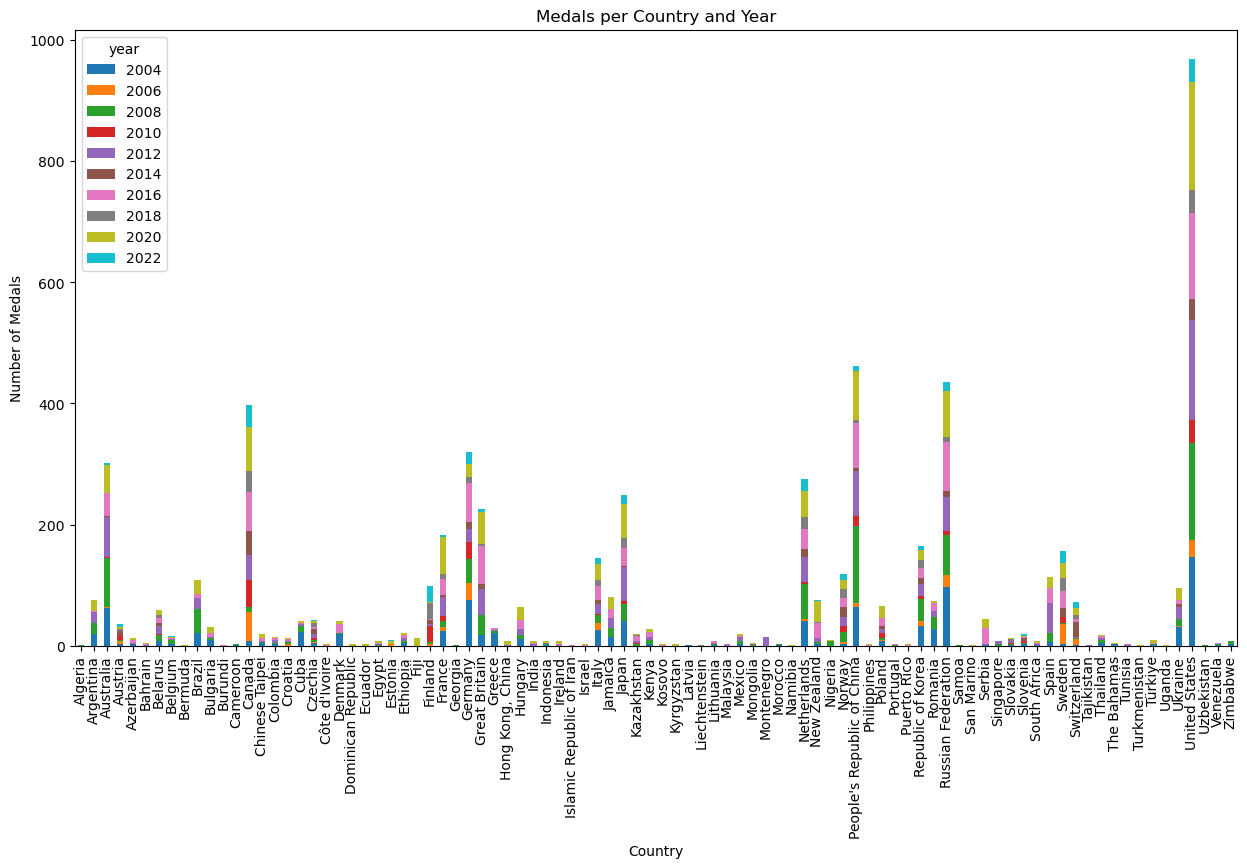

In [56]:
medals_by_country_year = female_country_event_recent_df.groupby(['country', 'year'])['medal'].count().unstack()

medals_by_country_year.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Medals per Country and Year')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.show()

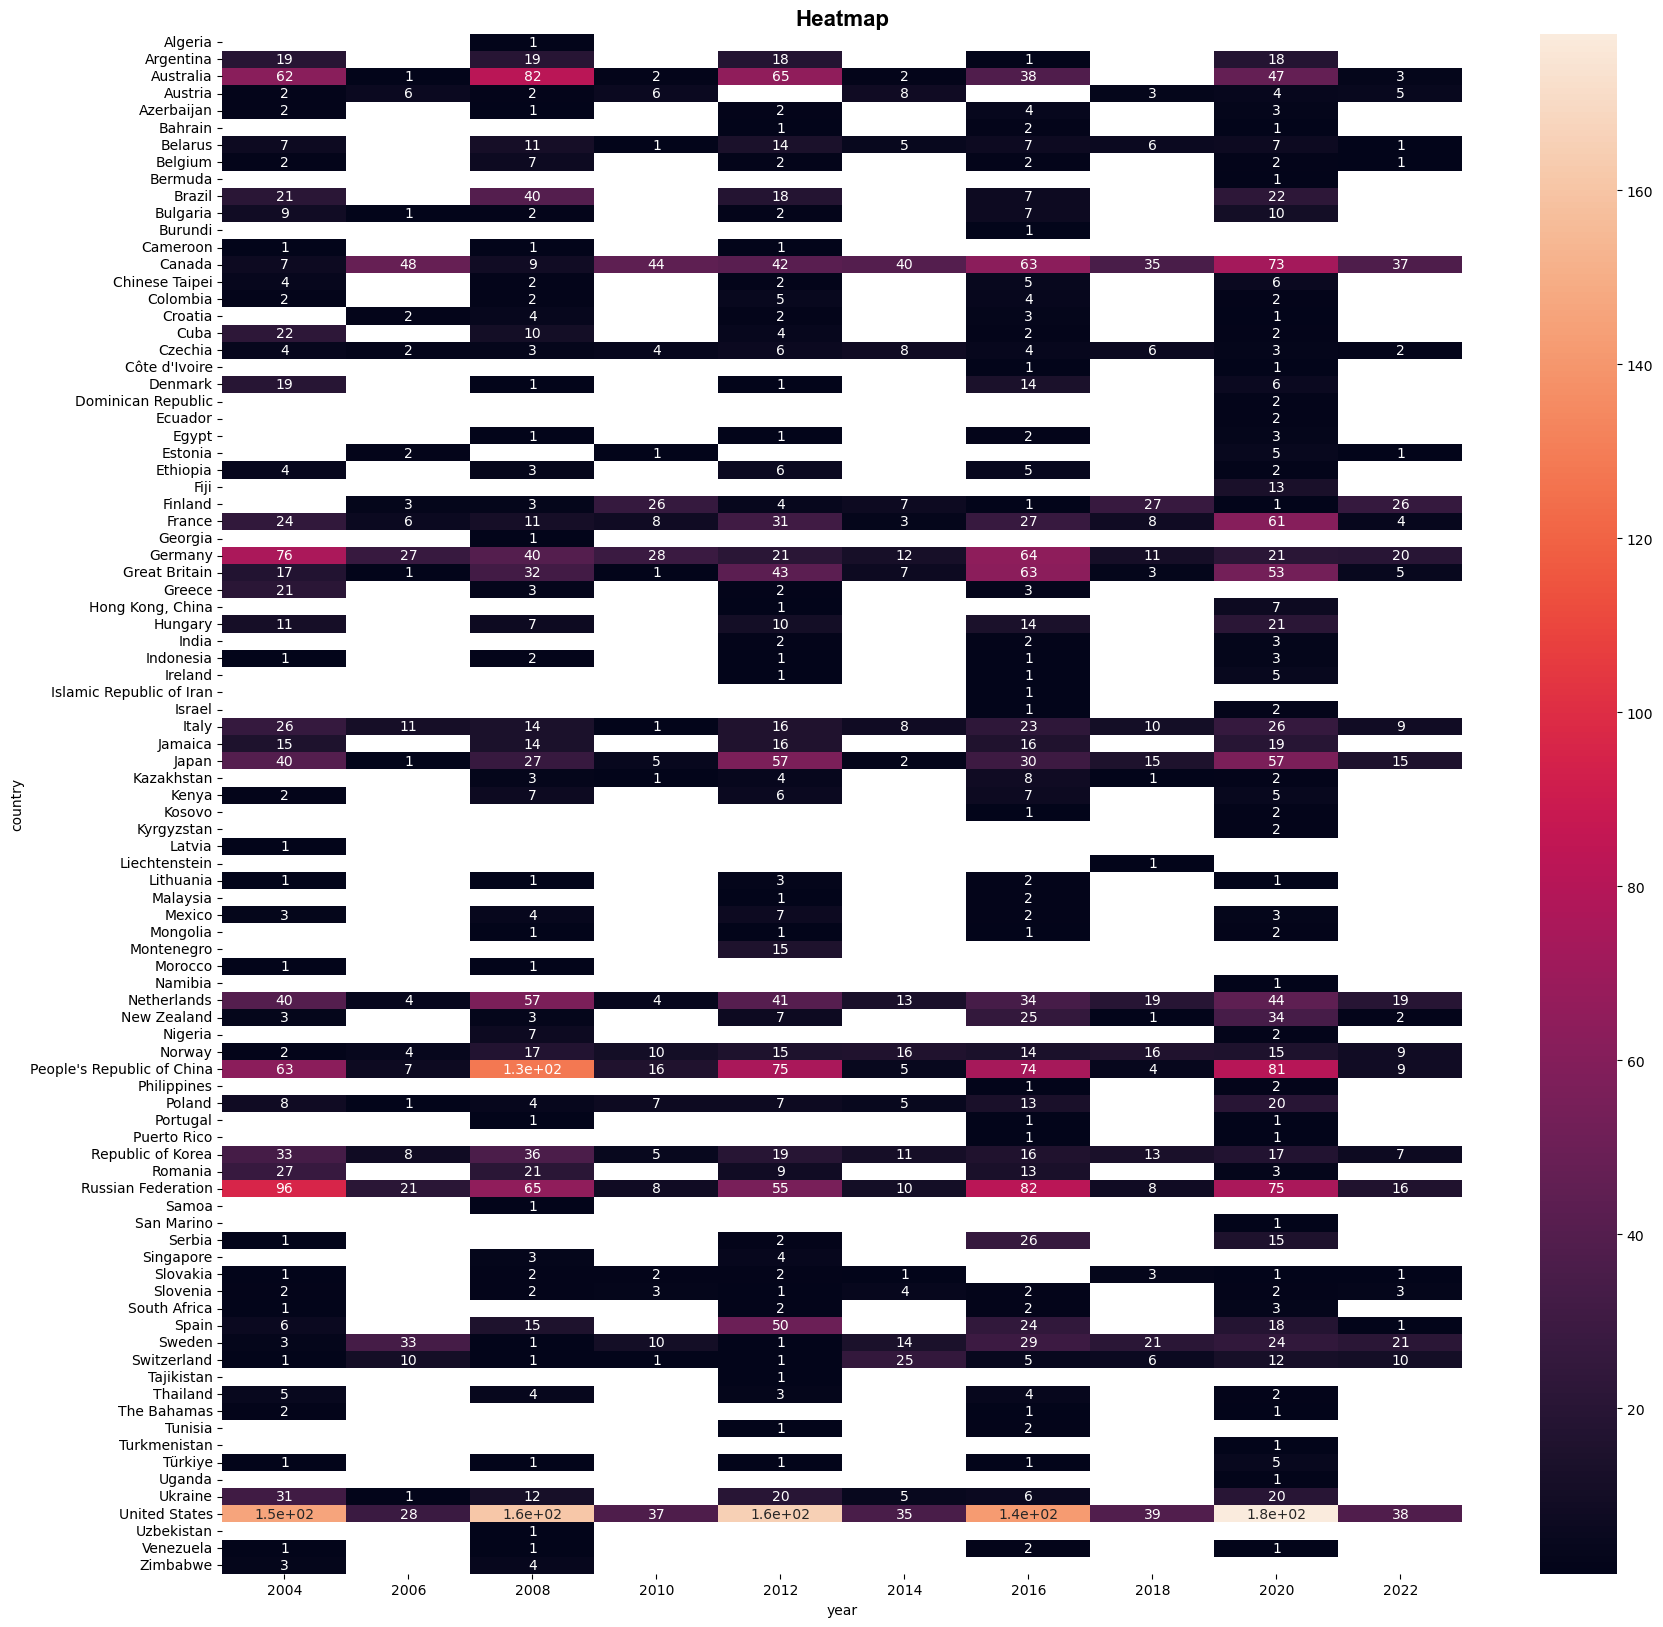

In [71]:
 # Change Canvas Size
plt.figure(figsize=(20, 20))

# Create a basic plot
df = medals_by_country_year = female_country_event_recent_df.groupby(['country', 'year'])['medal'].count().unstack()
sns.heatmap(df, annot=True)

# Customization
plt.title("Heatmap", fontweight="bold", fontsize=16, fontfamily="Arial")

# Show/Save the Graph
plt.show()

In [44]:
def get_medal_count_by_country(df, color):
    count_s = get_medal_color_df(df, 'Gold').groupby('country').count().iloc[:, 0].sort_values(ascending=False)
    return count_s

In [45]:
def get_all_medal_counts_by_country(df):
    medal_counts_by_country = {color: get_medal_count_by_country(df, color) 
                                  for color in MEDAL_TYPES}
    return medal_counts_by_country

In [46]:
# Sort the countries by the number of gold medals in descending order
female_country_event_recent_df= get_all_medal_counts_by_country(female_winter_olympics_df)
female_country_event_recent_df['Gold'].head(10)

NameError: name 'female_winter_olympics_df' is not defined

In [ ]:
print(female_winter_medal_counts_by_country['Gold'].index)
print(female_winter_medal_counts_by_country['Gold'].values)

In [ ]:
female_winter_olympics_df["sport"].head().values

In [ ]:
female_winter_olympics_df["sport"].head().values

In [ ]:
female_winter_olympics_df["sport"].describe()

In [ ]:

countries = female_winter_medal_counts_by_country['Gold'].index
medals_per_country = female_winter_medal_counts_by_country['Gold'].values

# Change Canvas Size
plt.figure(figsize=(20, 10))

# Create a basic plot
plt.scatter(countries, medals_per_country , color="#9A4C95", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Countries", fontfamily="Arial", fontsize=12)
plt.ylabel("Gold Count", fontfamily="Arial", fontsize=12)
plt.title("Gold per Country", fontweight="bold", fontsize=16, fontfamily="Arial")

plt.xticks(rotation=90)

# Set X/Y Limits
plt.ylim(-1, 150)
plt.xlim(-1, 25)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

In [ ]:
Gold_female_summer_olympics_df["country"].head(10).values
